In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()


Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


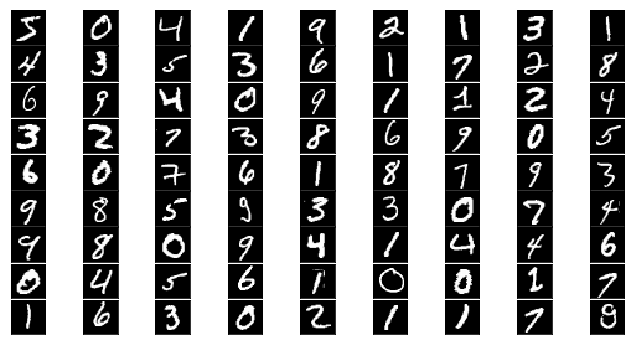

In [3]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i].reshape((28,28)),cmap='gray')
    

In [4]:
from keras.utils import np_utils
nb_classes = 10


In [5]:
# 画像を1次元配列化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


(60000, 'train samples')
(10000, 'test samples')


In [6]:
# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [8]:
model = Sequential()

model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# layerを追加した。Denceとreluを一つずつ追加。
# 精度が95%から96%に向上した。

In [9]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [10]:
# optimizer を Adam から SGD に変更した
# 学習に時間がかかるようになるかと思ったが、そんなことはなかった
# Adamと比べて、精度は下がった

In [11]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
1s - loss: 1.1863 - acc: 0.7418 - val_loss: 0.5186 - val_acc: 0.8903
Epoch 2/20
1s - loss: 0.4810 - acc: 0.8768 - val_loss: 0.3406 - val_acc: 0.9125
Epoch 3/20
1s - loss: 0.3790 - acc: 0.8957 - val_loss: 0.2882 - val_acc: 0.9228
Epoch 4/20
1s - loss: 0.3357 - acc: 0.9062 - val_loss: 0.2606 - val_acc: 0.9290
Epoch 5/20
1s - loss: 0.3086 - acc: 0.9122 - val_loss: 0.2424 - val_acc: 0.9340
Epoch 6/20
1s - loss: 0.2892 - acc: 0.9178 - val_loss: 0.2281 - val_acc: 0.9383
Epoch 7/20
1s - loss: 0.2731 - acc: 0.9223 - val_loss: 0.2167 - val_acc: 0.9387
Epoch 8/20
1s - loss: 0.2594 - acc: 0.9267 - val_loss: 0.2071 - val_acc: 0.9423
Epoch 9/20
1s - loss: 0.2478 - acc: 0.9292 - val_loss: 0.1990 - val_acc: 0.9438
Epoch 10/20
1s - loss: 0.2367 - acc: 0.9326 - val_loss: 0.1901 - val_acc: 0.9475
Epoch 11/20
1s - loss: 0.2270 - acc: 0.9356 - val_loss: 0.1830 - val_acc: 0.9512
Epoch 12/20
1s - loss: 0.2179 - acc: 0.9378 - val_loss: 0.1777 - val_

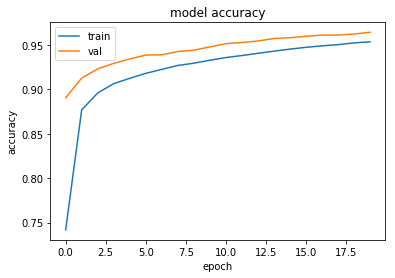

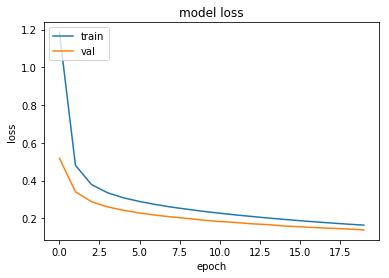

In [12]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.9527


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[ 966    0    1    1    0    3    5    2    1    1]
 [   0 1114    3    2    1    1    4    2    8    0]
 [   8    2  981    5    7    1    5   10   13    0]
 [   0    1   14  953    0   12    1   12   15    2]
 [   1    1    5    0  937    0   10    3    5   20]
 [   8    2    1   18    1  835   10    1   11    5]
 [  11    3    4    0   10   10  916    1    3    0]
 [   1    9   19    7    3    1    0  972    1   15]
 [   4    2    5   15    6    6   10    8  913    5]
 [   7    6    1   10   25    5    1    9    5  940]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.95      0.95      0.95      1032
          3       0.94      0.94      0.94      1010
          4       0.95      0.95      0.95       982
          5       0.96      0.94      0.95       892
          6       0.95      0.96      0.95       958
          7       0.95      0.95      0.95  